# Database Systems Project

#### Group: Maxim Daniel, Mathias Husted, Sonja Kutscher

For this project, we have been given 2 datasets `hochschulen.csv` and `bevoelkerung.csv` to analyze. We have to complete 8 separate tasks, including pitching an idea for ways to analyze the dataset, preprocessing the data, performing queries on it and visualize our results. We will be using PostgreSQL with the Python framework psycopg.

Let's start with the imports!

In [1]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt

## Task 1 (Project idea)

1) Have a look at the data sets hochschulen.csv and bevoelkerung.csv
2) Conceptualize a data visualization that integrates and effectively presents information from
the given datasets. Prepare a brief written description of your project goal.

Let's start by having a look at the data

In [2]:
# We'll use pandas to read the csv files so we can see what's going on before we start:
unis = pd.read_csv("hochschulen.csv", sep=";")
unis.head()

,Hochschulkurzname,Hochschulname,Hochschultyp,Trägerschaft,Bundesland,Anzahl Studierende,Gründungsjahr,Promotionsrecht,Habilitationsrecht,Straße,Postleitzahl (Hausanschrift),Ort (Hausanschrift),Home Page
0,Aachen FH,Fachhochschule Aachen,Fachhochschulen / HAW,öffentlich-rechtlich,Nordrhein-Westfalen,14086,1971,Nein,Nein,Bayernallee 11,52066.0,Aachen,http://www.fh-aachen.de
1,Aachen TH,Rheinisch-Westfälische Technische Hochschule A...,Universitäten,öffentlich-rechtlich,Nordrhein-Westfalen,45527,1870,Ja,Ja,Templergraben 55,52062.0,Aachen,https://www.rwth-aachen.de
2,Aalen H,Hochschule Aalen - Technik und Wirtschaft,Fachhochschulen / HAW,öffentlich-rechtlich,Baden-Württemberg,4559,1962,Nein,Nein,Beethovenstraße 1,73430.0,Aalen,http://www.hs-aalen.de
3,Albstadt-Sigmaringen H,Hochschule Albstadt-Sigmaringen,Fachhochschulen / HAW,öffentlich-rechtlich,Baden-Württemberg,2666,1971,Nein,Nein,Anton-Günther-Straße 51,72488.0,Sigmaringen,www.hs-albsig.de
4,Alfter HfKuG,Alanus Hochschule für Kunst und Gesellschaft,Künstlerische Hochschulen,"privat, staatlich anerkannt",Nordrhein-Westfalen,1564,1973,Ja,Nein,Villestraße 3,53347.0,Alfter,https://www.alanus.edu/de/home


That looks alright for now, now let's try loading the other dataset

In [3]:
population = pd.read_csv("bevoelkerung.csv", sep=";", encoding='ISO-8859-1')
population.head()

,,,,GENESIS-Tabelle: 12411-01-01-4
Bevölkerung nach Geschlecht - Stichtag 31.12. - regionale,NaN,NaN,NaN,NaN
Tiefe: Kreise und krfr. Städte,NaN,NaN,NaN,NaN
Fortschreibung des Bevölkerungsstandes,NaN,NaN,NaN,NaN
Bevölkerungsstand (Anzahl),NaN,NaN,NaN,NaN
NaN,NaN,Stichtag,Stichtag,Stichtag


We have some general information at the top of the table with some metadata. We're not interested in that, so let's try and skip it

In [4]:
population = pd.read_csv("bevoelkerung.csv", sep=";", encoding='ISO-8859-1', skiprows=7)
population.head()

,Unnamed: 0,Unnamed: 1,Insgesamt,männlich,weiblich
0,DG,Deutschland,84358845,41559052,42799793
1,01,Schleswig-Holstein,2953270,1443269,1510001
2,01001,"Flensburg, kreisfreie Stadt",92550,45874,46676
3,01002,"Kiel, kreisfreie Stadt",247717,120149,127568
4,01003,"Lübeck, kreisfreie Stadt, Hansestadt",218095,104723,113372


Alright, that's definitely a mess. That will need some cleaning up, which we'll do for task 3.

Now, let's continue with the visualizations. For the first plot we will show the top 10 universities in Germany by no. of students:

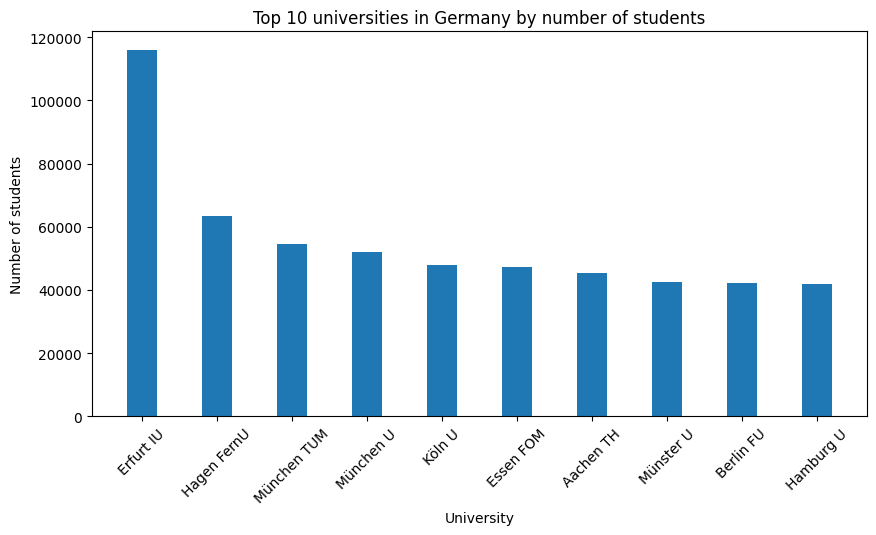

In [45]:
# Hochschulen
unis['Anzahl Studierende'] = pd.to_numeric(unis['Anzahl Studierende'], errors='coerce') # Represent the row as a number

top_unis = unis.dropna(subset=['Anzahl Studierende'])
top_unis = top_unis.sort_values(['Anzahl Studierende'], ascending=False).head(10)

fig = plt.figure(figsize=(10,5))

plt.bar(top_unis['Hochschulkurzname'], top_unis['Anzahl Studierende'], width=0.4)
plt.title("Top 10 universities in Germany by number of students")
plt.ylabel("Number of students")
plt.xlabel("University")
plt.xticks(rotation=45)
plt.show()

For the population dataset, we will need to do data cleaning before we can represent it graphically.

**Project goal:** For our project, our goal is to
1) Find out which federal states have the most universities and students per capita
2) Find out correlations between the founding year of a university and its number of students
3) Visualize gender differences in the population in built up vs. rural areas of Germany
4) Find out the popularity differences between universities and universities of applied sciences (Fachhochschulen) as well as public vs. private universities

## Task 2 (Data schema and database set up)

1) Identify the relevant data fields for analysis and visualization.
2) Draw an Entity-Relationship model (ERM) for the datasets.
3) Transform the ERM into a relational model.
4) Set up a PostgreSQL database based on the relational model.

2.1: For the **population** dataset, the relevant fields are:
- ???
- ???

For the **universities** dataset, the relevant fields are:
- Hochschulname
- Hochschultyp
- Bundesland
- Gründungsjahr
- Trägerschaft
- Ort